In [9]:
import os

import numpy as np
from glob import glob

import itk

import site
site.addsitedir("../../ARGUS")

from ARGUS_IO import *

from ARGUS_ptx_ar_inference import ARGUS_ptx_ar_inference

In [10]:
ptx_ar = ARGUS_ptx_ar_inference(config_file_name="../../ARGUS/ARGUS_ptx_ar.cfg", network_name="final", device_num=0)


In [7]:
files = glob("Phase1_TestData/*mp4")

In [8]:
vid = ARGUS_load_video(files[0])

Using non-standard frame rate 10240/512


In [11]:
ptx_ar.preprocess(vid)

In [18]:
img = ptx_ar.input_image
itk.imwrite(img, files[0][:-3]+"mha")

(12, 320, 320)
12


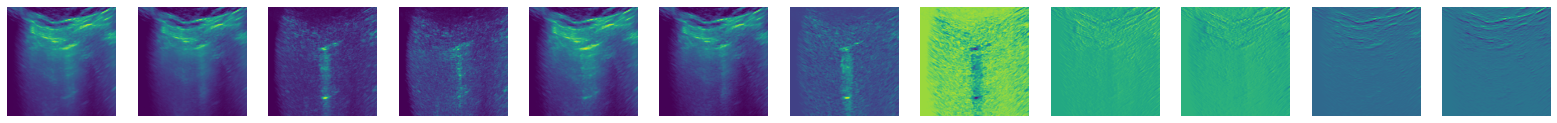

In [12]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

arr = ptx_ar.input_array
print(arr.shape)
num_channels = arr.shape[0]
print(num_channels)
plt.figure(figsize=[30, 30])
for c in range(num_channels):
    plt.subplot(
        2,
        num_channels + 1,
        (num_channels + 1) + c + 1,
    )
    plt.axis('off')
    plt.imshow(rotate(arr[c, :, :],270))
plt.show()

In [19]:
for file in files:
    vid = ARGUS_load_video(file)
    ptx_ar.preprocess(vid)
    img = ptx_ar.input_image
    itk.imwrite(img, file[:-3]+"mha")